# Assignment 2: Part B (60 marks)

Assignment 2 uses data collected by the U.S. Census Bureau’s **American Community Survey** (ACS).  ACS datasets and documentation for this assignment are provided in the `data` folder.

> *Have you ever thought about how, or why, new roads, schools, after-school programs, or hospitals are placed in communities?  Why there is an ATM or bike-share kiosk on a specific street corner? <br>
The answers often lie in the numbers — numbers that reflect what our communities look like, how our communities have changed, and how those changes impact our daily lives.
<br/><br/>The U.S. Census Bureau’s American Community Survey (ACS) is designed to answer these types of questions and to meet the needs of policymakers, business leaders, planners, and others nationwide who need good
data to make informed decisions*. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

### B1 Load health insurance data (5 marks)
The Health Insurance Coverage for all five boroughs was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `health-insurance.xlsx` 

For the `b1_load()` function below: 
- Load the Health Insurance Coverage excel spreadsheet `health-insurance.xlsx` into a DataFrame.
  - Your DataFrame's row and column indexes should match those in the excel spreadsheet.
  - You will need to convert data values from strings into integers.
- The code cell provided below function b1_load() - shown below - should return the value `8557254`.
  - Which is the `Civilian noninstitutionalized population` of New York City.

`b1 = b1_load()
 b1['New York City','Estimate'][0]`
 
 

In [2]:
def b1_load():
    # Read the excel File
    data = pd.read_excel('data/health-insurance.xlsx', sheet_name='Sheet1',  index_col=0)
    columns = data.columns       #Get columns names
    current_column = ''          
    new_data = {}               #New Data Frame
    for column in columns:   
        #After Reading exel file there's some unnamed columns created because of Multi indexing of columns
        #Set unnamed column to its right column using  current_column varibale
        if "Unnamed" not in column:     
            current_column = column
            for i in range(data[column][1:].size):
                #Converting Estimate values to int
                data[column][1:][i] = int(data[column][1:][i].replace(',',''))
        #createing new data frame with City and Measurement Types
        new_data[current_column, data[column][0]] = data[column][1:][:]
    #return new Feame
    return new_data

In [3]:
b1 = b1_load()
b1['New York City','Estimate'][0]

8557254

### B2 Two takes on health insurance - Take 1 & 2 [10 marks]
The ACS economic dataset provides a breakdown of the percentage of the population for each borough who have Private health insurance, Public coverage or No health insurance.  Note: percentages for private and public coverage given in the dataset are based on the percentage with health insurance coverage.

Create two vertical bar charts which show the percentage of the population for each borough who have Private health insurance, Public coverage or No health insurance.  Your plot should also include NYC as a sixth 'borough' for comparison. One plot similar to Figure 5.15 from TA-5.ipynb notebook and the other similar to Figure 5.16.

- `b2Take1()`: Compares resident health insurance **within** each borough and NYC as a whole [8 marks]
- `b2Take2()`: Compares resident health insurance **across** boroughs and NYC as a whole [8 marks]

Your `b2Take1()` and `b2Take1()` functions should:
- call the `b1_load()` function to retrieve the Health Insurance Data Frame  
- extract health insurance coverage data for each borough 
- create plots similar to Figure 5.15 (b2Take1) and Figure 5.16 (b2Take2). See example figures provided in the A2 files.
  - different coloured bars for each borough or health insurance category
  - each category (borough or health insurance) coverage category has its own grouping
  - appropriate labels and legend

In [4]:
def b2Take1():
    # Get b1_load() function value to b1
    b1 = b1_load()
    
    #Get city list
    cities = list()
    for city,mes in b1:
        if city not in cities:
            cities.append(city)
    
    #get parcentage og Private health insurance, Public coverage or No health insurance from b1
    private_percent = list(float(b1[city,'Percent'][2].replace('%','')) for city in cities)
    public_percent = list(float(b1[city,'Percent'][3].replace('%','')) for city in cities)
    no_percent = list(float(b1[city,'Percent'][4].replace('%','')) for city in cities)

    #Set figure Size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    
    #Create Bars for parcentage og Private health insurance, Public coverage or No health insurance
    index = np.arange(len(cities))
    plt.bar(index-0.22, private_percent, width=0.2 ,alpha=0.6 , label='Private')
    plt.bar(index, public_percent, width=0.2 ,alpha=0.6 ,label='Public')
    plt.bar(index+0.22, no_percent, width=0.2,alpha=0.6, label='None')

    # Set title , ylabel, xtrickd and legent and show plot
    plt.xlabel('Boroughs of NYC')
    plt.ylabel('%Borough Population')
    plt.title('Resident health insurance within NYC Boroughs')
    plt.xticks(index , cities)
    plt.rcParams["legend.loc"] = 'upper left'
    plt.legend(framealpha=1, frameon = True)
    plt.tight_layout()
    plt.show()


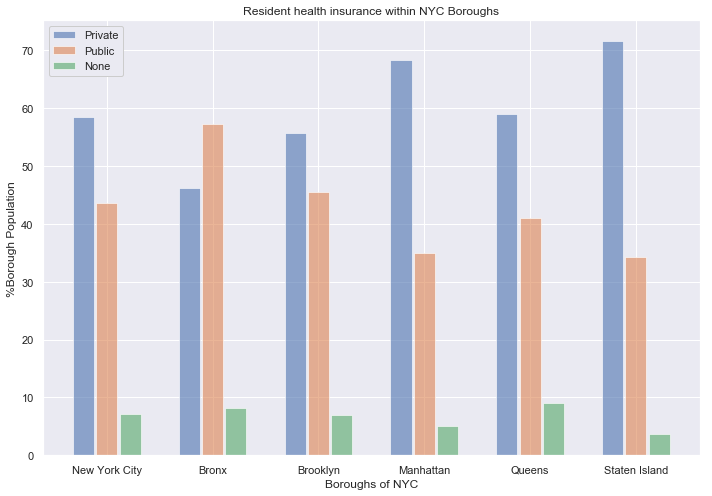

In [5]:
b2Take1()

In [6]:
def b2Take2():
    # Get b1_load() function value to b1
    b1 = b1_load()
    
    #Get the list of cities
    cities = list()
    for city,mes in b1:
        if city not in cities:
            cities.append(city)
    
    #Set Figuare Size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size

    #Create Bars for parcentage og Private health insurance, Public coverage or No health insurance
    index = np.arange(3)
    for i in range(len(cities)):
        city = cities[i]
        private_percent = float(b1[city,'Percent'][2].replace('%',''))
        public_percent = float(b1[city,'Percent'][3].replace('%',''))
        no_percent = float(b1[city,'Percent'][4].replace('%',''))
        plt.bar(index + (i*.11), np.asarray([private_percent, public_percent , no_percent]), width=0.1 ,alpha=0.6 ,label=city)
    
    # Set title , ylabel, xtrickd and legent and show plot
    plt.xlabel('Health Insurance Coverage')
    plt.ylabel('%Borough Population')
    plt.title('Resident health insurance across NYC Boroughs')
    xlabels = np.asarray(['Private', 'Public', "None"])
    plt.xticks(index , xlabels)
    plt.rcParams["legend.loc"] = 'upper right'
    plt.legend(framealpha=1, frameon = True)

    plt.tight_layout()
    plt.show()
    


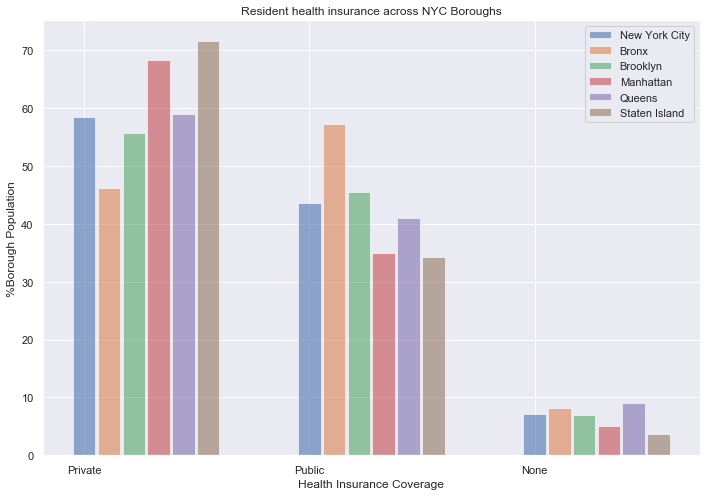

In [7]:
b2Take2()

## B3 Loading commuter data (3 marks)
Data on how the residents of the five boroughs (Workers 16 years and over) commute to work was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `commuting.xlsx` 

For the `b3_load()` function below: 
- Load the Commuting excel spreadsheet `commuting.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b3_load() - shown below - should return the value `4072761`.
  - Which is the the number of `Workers 16 years and over` in New York City.

`b3 = b3_load()
 b3['New York City','Estimate'][0]`

In [8]:
def b3_load():
    # Read the excel File
    data = pd.read_excel('data/commuting.xlsx', sheet_name='Sheet1',  index_col=0)
    columns = data.columns        #Get columns names
    current_column = ''
    new_data = {}                #New Data Frame
    for column in columns:   
        #After Reading exel file there's some unnamed columns created because of Multi indexing of columns
        #Set unnamed column to its right column using  current_column varibale
        if "Unnamed" not in column:
            current_column = column
            for i in range(data[column][1:].size):
                #Converting Estimate values to int
                data[column][1:][i] = int(data[column][1:][i].replace(',',''))
        #createing new data frame with City and Measurement Types
        new_data[current_column, data[column][0]] = data[column][1:][:]
    #return new Feame
    return new_data


In [9]:
b3 = b3_load()
b3['New York City','Estimate'][0]

4072761

In [10]:
b3

{('New York City', 'Estimate'): Borough
     Workers 16 years and over                      4072761
       Car, truck, or van -- drove alone             909776
       Car, truck, or van -- carpooled               186153
       Public transportation (excluding taxicab)    2272028
       Walked                                        411388
       Other means                                   120112
       Worked at home                                173304
 Name: New York City, dtype: object,
 ('New York City', 'Margin of Error'): Borough
     Workers 16 years and over                      +/-21,353
       Car, truck, or van -- drove alone            +/-17,042
       Car, truck, or van -- carpooled               +/-7,365
       Public transportation (excluding taxicab)    +/-21,937
       Walked                                       +/-13,299
       Other means                                   +/-7,159
       Worked at home                                +/-6,987
 Name: Unnamed: 2, dty

### B4 Commuting to work (7 marks)
The ACS economic dataset provides information on how the residents of the five boroughs (Workers 16 years and over) commute to work.

Create a line chart which shows the percentage of the population for each borough and their means of commuting. Your plot should also include NYC as a sixth 'borough' for comparison.  You may find Figure 5.17 from the Truthful Art helpful.  This plot was discussed in the TA-5 notebook.

Your `b4()` function should:
- call the `b3_load()` function to retrieve the Commuter Data Frame  
- extract commuter data for each type of commuting for each borough 
- create a plot similar to Figure 5.17 from the Truthful Art (see figure b4.png in the A2 files).
  - different coloured lines for each commuting category 
  - appropriate labels and legend

In [11]:
def b4():
    # Get b3_load() function value to b3
    b3 = b3_load()
    
    #Get the list of cities
    cities = list()
    for city,mes in b3:
        if city not in cities:
            cities.append(city)
    
    #Get necessary values for every City
    alone_percent = list(float(b3[city,'Percent'][1].replace('%','')) for city in cities)
    carpool_percent = list(float(b3[city,'Percent'][2].replace('%','')) for city in cities)
    public_percent = list(float(b3[city,'Percent'][3].replace('%','')) for city in cities)
    walk_percent = list(float(b3[city,'Percent'][4].replace('%','')) for city in cities)
    other_percent = list(float(b3[city,'Percent'][5].replace('%','')) for city in cities)
    home_percent = list(float(b3[city,'Percent'][6].replace('%','')) for city in cities)
    
    #Plots the value with labels
    index = np.arange(len(cities))
    plt.plot(index, alone_percent , label='Drove Alone' , marker='o')
    plt.plot(index, carpool_percent,  label='Carpool' , marker='o') 
    plt.plot(index, public_percent, label='Public Transport' , marker='o') 
    plt.plot(index, walk_percent,  label='Walked' , marker='o')
    plt.plot(index, other_percent,  label='Other' , marker='o')
    plt.plot(index, home_percent,  label='Home' , marker='o')
    
    
    #Set Fighuare Size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    
     # Set title , ylabel, xtrickd and legent and show plot
    plt.xlabel('Boroughs of NYC')
    plt.ylabel('%Working Population(workers >= 16 years)')
    plt.title('Types of commuting within NYC Boroughs')
    plt.xticks(index , cities)
    plt.rcParams["legend.loc"] = 'center'
    plt.legend(framealpha=1, frameon = True)

    plt.tight_layout()
    plt.show()


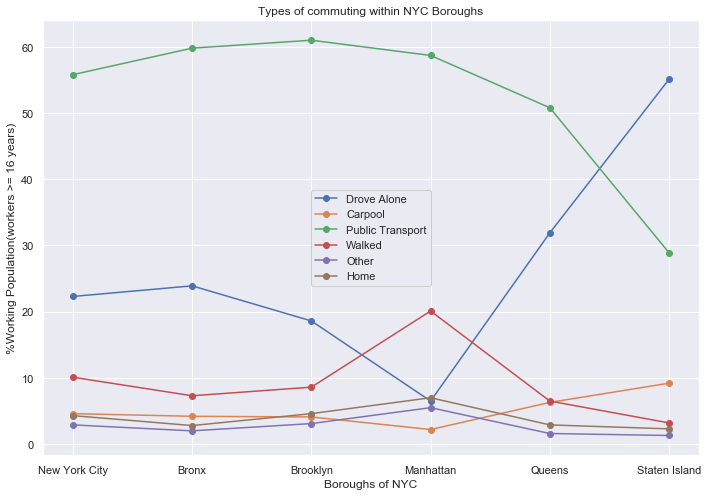

In [12]:
b4()

### B5 Loading total household income & benefits (3 marks)
Data on the total household income and benefits for the residents of the five boroughs was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `income-benefits.xlsx` 

For the `b5_load()` function below: 
- Load the income and benefits excel spreadsheet `income-benefits.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b5_load() - shown below - should return the value `3159674`.
  - Which is the the number of Total Households in New York City.

`b5 = b5_load()
 b5['New York City','Estimate'][0]`

In [13]:
def b5_load():
    # Read the excel File
    data = pd.read_excel('data/income-benefits.xlsx', sheet_name='Sheet1',  index_col=0)
    columns = data.columns            #Get columns names
    current_column = ''
    new_data = {}                     #New Data Frame
    for column in columns:   
        #After Reading exel file there's some unnamed columns created because of Multi indexing of columns
        #Set unnamed column to its right column using  current_column varibale
        if "Unnamed" not in column:
            current_column = column
            for i in range(data[column][1:].size):
                #Converting Estimate values to int
                data[column][1:][i] = int(data[column][1:][i].replace(',',''))
        #createing new data frame with City and Measurement Types
        new_data[current_column, data[column][0]] = data[column][1:][:]
    #return new Feame
    return new_data

In [14]:
b5 = b5_load()
b5['New York City','Estimate'][0]

3159674

### B6 Income and benefits (7 marks)
How does the total household income and benefits compare across the five boroughs?  The ACS economic dataset, econ_2017acs1yr_nyc.xlsx, breaks total household income into ten categories.

Create a line chart which plots the household income category versus percent population for each of the five boroughs.   Include New York City in your chart for comparison.

Your `b6()` function should:
- call the `b5_load()` function to retrieve the Household income and benefits data
- extract household income and benefits for each borough 
- create a multiple line chart (See figure b6.png) with
  - different coloured lines for each borough 
  - appropriate labels and legend
  - appropriate dimensions


In [15]:
def b6():
    # Get b5_load() function value to b5
    b5 = b5_load()
    cities = list()
    for city,mes in b5:
        if city not in cities:
            cities.append(city)
            
    #Set Fig size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size

    index = np.arange(10)
    #Get the plot values of every city and plot the values
    for i in range(len(cities)):
        city = cities[i]
        percent = np.asarray([float(b5[city,'Percent'][j+1].replace('%','')) for j in range(10)])
        plt.plot(index, percent, label=city , marker='o')
        
    # Set title , ylabel, xtrickd and legent and show plot  
    plt.xlabel('Household income and benefits')
    plt.ylabel('%Borough Population')
    plt.title('Household income and benefits across NYC Boroughs')
    xlabels = np.asarray(['Less than $10,000', '$10,000 to $14,999' , '$15,000 to $24,999' ,'$25,000 to $34,999' , 
                          '$35,000 to $49,999' ,'$50,000 to $74,999' , '$75,000 to $99,999' , '$100,000 to $149,999', 
                          '$150,000 to $199,999' , '$200,000 or more' ])
    plt.xticks(index , xlabels , rotation=285)
    plt.rcParams["legend.loc"] = 'upper left'
    plt.legend(framealpha=1, frameon = True)

    plt.tight_layout()
    plt.show()


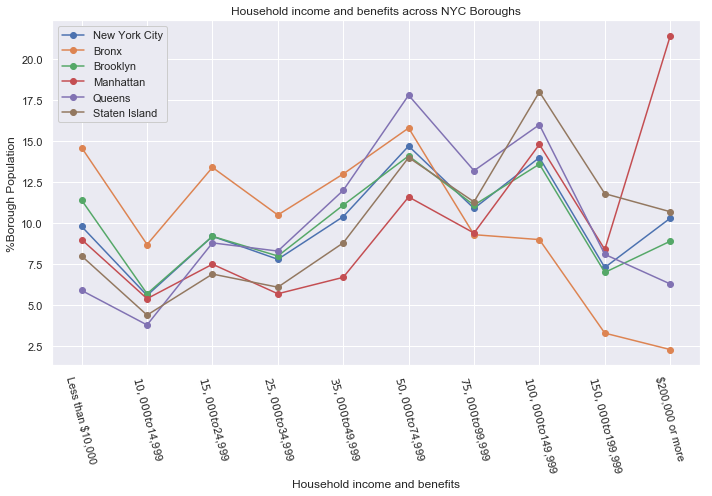

In [16]:
b6()

### B7 Loading resident age categories (5 marks)
The breakdown of resident age into categories (Under 5 years, 5 to 9 years, etc.) for the residents of the five boroughs was extracted from the ACS demographic dataset and loaded into the excel spreadsheet:  `demographics.xlsx` 

For the `b7_load()` function below: 
- Load the resident's age data from the excel spreadsheet `demographics.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b7_load() - shown below - should return the value `40.4`.
  - Which is the the Median age in (years) for Staten Island residents.

`b7 = b7_load()
 b7['Staten Island','Estimate'][-1]`

In [17]:
def b7_load():
    # Read the excel File
    data = pd.read_excel('data/demographics.xlsx', sheet_name='Sheet1',  index_col=0)
    columns = data.columns     #Get columns names
    current_column = ''
    new_data = {}              #New Data Frame
    for column in columns:   
        #After Reading exel file there's some unnamed columns created because of Multi indexing of columns
        #Set unnamed column to its right column using  current_column varibale
        if "Unnamed" not in column:
            current_column = column
            for i in range(data[column][1:].size):
                #Converting Estimate values to float
                data[column][1:][i] = float(data[column][1:][i].replace(',',''))
        #createing new data frame with City and Measurement Types
        new_data[current_column, data[column][0]] = data[column][1:][:]
    #return new Feame
    return new_data


In [18]:
b7 = b7_load()
b7['Staten Island','Estimate'][-1]

40.4

In [19]:
b7

{('New York City', 'Estimate'): Borough
       Under 5 years              552576
       5 to 9 years               475122
       10 to 14 years             482943
       15 to 19 years             460028
       20 to 24 years             575248
       25 to 34 years        1.55198e+06
       35 to 44 years        1.17958e+06
       45 to 54 years        1.10016e+06
       55 to 59 years             518681
       60 to 64 years             490744
       65 to 74 years             694522
       75 to 84 years             372506
       85 years and over          168601
       Median age (years)           36.6
 Name: New York City, dtype: object,
 ('New York City', 'Margin of Error'): Borough
       Under 5 years           +/-654
       5 to 9 years          +/-9,087
       10 to 14 years        +/-8,920
       15 to 19 years        +/-1,296
       20 to 24 years        +/-1,445
       25 to 34 years        +/-1,893
       35 to 44 years        +/-1,650
       45 to 54 years        +/-1,09

### B8 Age demographics of NYC Boroughs  (10 marks)
How do the relative age distributions compare across the five boroughs?  Are some areas more 'youthful' then others?  Are some perhaps more 'middle-aged'? The ACS demographic dataset, demo_2017acs1yr_nyc.xlsx, provides a breakdown of resident ages into 13 categories:
<table>
   <tr><td>0 to 19 years</td><td>20 to 54 years</td><td>55 and over</td></tr>
   <tr><td style="vertical-align:top">Under 5 years<br>5 to 9 years<br>10 to 14 years<br>15 to 19 years</td>
       <td style="vertical-align:top">20 to 24 years<br>25 to 34 years<br>35 to 44 years<br>45 to 54 years</td>
       <td>55 to 59 years<br>60 to 64 years<br>65 to 74 years<br>75 to 84 years<br>85 years and over</td>
   </tr>
</table>

Create a row of 3 subplots, where each subplot provides a line chart which plots the percentage of the population across the boroughs which fall into each of the relative age distribution groupings shown above.  Include New York City data in your chart for comparison.

The first subplot will show the four age categories for residents aged from 0 to 19 across the five boroughs. The middle sublot will show the four age categories from 20 to 54 years. And the last suplot will show the age categories for residents 55 and over. See figure b8.png.

Your `b8()` function should:
- call the `b1_load()` function to retrieve the total population of each borough
- call the `b7_load()` function to retrieve the relative age distributions data from the demographics data.
- extract age distributions for each borough 
- create a row of 3 subplots which share the y-axis values and label 
  - different colored lines for each borough
  - appropriate y axis value range to accommodate all three plots
  - appropriate labels and legend
  - appropriate dimensions

In [20]:
def b8():
        
    # Get b1_load() function value to b1
    b1 = b1_load()
    
    
    # Get b7_load() function value to b7
    b7 = b7_load()
    
    #get the list of cities
    cities = list()
    for city,mes in b7:
        if city not in cities:
            cities.append(city)
            
    
    #cteate new Figuare and set size
    fig = plt.figure(figsize=(9,9))

    #Create First subpolt
    subplot1 = fig.add_subplot(1,3,1)
    
    #set limit of y axis and x asix indexes
    subplot1.set(ylim=(0, 25))
    index = np.arange(4)
    
    #Set Ylabel, xLabel and title
    plt.ylabel('%Population')
    plt.xlabel('Population age <= 19 years')
    plt.title('%Population <= 19 years')
    
    #set x axis indexs name
    xlabels = np.asarray(['Under 5', '5 to 9' , '10 to 14' ,'15 to 19' ])
    plt.xticks(index , xlabels , rotation=285)

    #set values for first subplot and plot them
    for i in range(len(cities)):
        city = cities[i]
        percent = np.asarray([float(b7[city,'Percent'][j].replace('%','')) for j in range(4)])
        subplot1.plot(index, percent, label=city , marker='o')
     
    #Create Second subpolt
    subplot2 = fig.add_subplot(1,3,2)
    
    #set limit of y axis and x asix indexes
    subplot2.set(ylim=(0, 25))
    index = np.arange(4)+4
    
    #Set xLabel and title and X axis labels
    xlabels = np.asarray(['20 to 24', '25 to 34', '35 to 44' ,'45 to 54' ])
    plt.xticks(index , xlabels , rotation=285)  
    plt.xlabel('Population Age 20 to 54')
    plt.title('%Population 20 to 54')

    #set values for second subplot and plot them
    for i in range(len(cities)):
        city = cities[i]
        percent = np.asarray([float(b7[city,'Percent'][j].replace('%','')) for j in range(4,8)])
        subplot2.plot(index, percent, label=city , marker='o')
    
    #Create Third subpolt
    subplot3 = fig.add_subplot(1,3,3)
    
    #set limit of y axis and x asix indexes
    subplot3.set(ylim=(0, 25))
    index = np.arange(5)+8
    
     #Set xLabel and title and X axis labels
    xlabels = np.asarray(['55 to 59', '60 to 64' , '65 to 74' ,'75 to 84','85 & older'])
    plt.xticks(index , xlabels , rotation=285)
    plt.xlabel('Population Age 55 and over')
    plt.title('%Population 55 and over')

    #set values for third subplot and plot them
    for i in range(len(cities)):
        city = cities[i]
        percent = np.asarray([float(b7[city,'Percent'][j].replace('%','')) for j in range(8,13)])
        subplot3.plot(index, percent, label=city , marker='o')
        
    
    #sey legend and show plot
    plt.rcParams["legend.loc"] = 'upper right'
    plt.legend(framealpha=1, frameon = True)
    plt.tight_layout()
    plt.show()


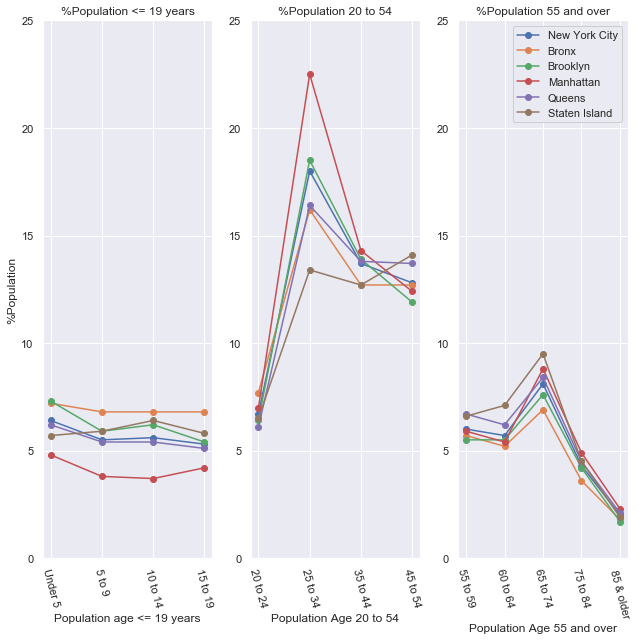

In [21]:
b8()

### B9: Analyse and discuss (10 marks)
Based on your analysis of NYC data, write an essay (~ 600 words) discussing your findings on the differences and similarities of the residents of the five NYC boroughs. Include this essay in your Part A document.